[[1.         0.50195612]
 [0.50195612 1.        ]]


C:\Users\alcan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


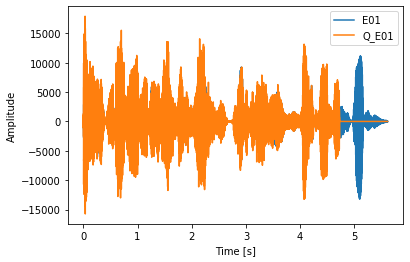

In [6]:
#CORRELATION COEFFICIENT

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

#print(os.getcwd())
#os.chdir('\\Users\\alcan\\anaconda3\\Procon')

samplerate, data = wavfile.read('E01.wav')
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])

samplerate2, data2 = wavfile.read('Q_E01.wav')
data2_resize = data2.copy()
data2_resize.resize(data.shape[0],refcheck=False)
length2 = data2_resize.shape[0] / samplerate2
time2 = np.linspace(0., length2, data2_resize.shape[0])

corr_coeff = np.zeros[data.shape[0]-data2.shape[0]]
i = 0
while i < (data.shape[0]-data2.shape[0]):
  corr_coeff[i] = np.corrcoef(data, data2_resize)
  i += 1
else:
  print("i is no longer less than 6")
corr_coeff = np.corrcoef(data, data2_resize)

#plt.xlim([3.75, 4.25])

print(corr_coeff)
plt.plot(time, data, label="E01")
plt.plot(time, data2_resize, label="Q_E01")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#write("try.wav", samplerate, datass.astype(np.int16))

-24337
[16032 24803  6474 ...  6474 24803 16032]
32767 -55488.5


C:\Users\alcan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


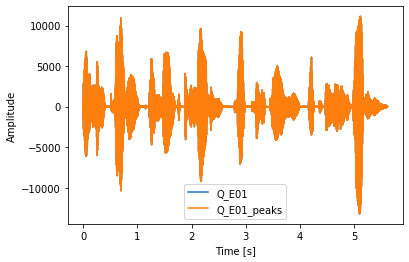

In [15]:
#CROSS CORRELATION (seems not working correctly)

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
from scipy import signal

#print(os.getcwd())
#os.chdir('\\Users\\alcan\\anaconda3\\Procon')

samplerate, data = wavfile.read('E01.wav')
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])

samplerate2, data2 = wavfile.read('E01.wav')
data2_resize = data2.copy()
data2_resize.resize(data.shape[0],refcheck=False)
length2 = data2_resize.shape[0] / samplerate2
time2 = np.linspace(0., length2, data2_resize.shape[0])           

#corr = signal.correlate(data, data2_resize, method = 'fft')
#lags = signal.correlation_lags(len(data2_resize), len(data))
#corr /= np.max(corr)

corr = np.correlate(data, data2_resize, mode = "same")
best_cor = 0 #highest value
best_cor_loc = 0 #lag
temp = 0
half = data.shape[0]/2
print(corr[int(half)])

for num in corr:
    if(num > best_cor):
        best_cor = num
        best_cor_loc = temp
    temp = temp + 1

print(corr)
#print(lags)

#corr_coeff = np.corrcoef(data, data2_resize)
#corr = scipy.signal.correlate(data, data2_resize, mode='full')
best_cor_loc -=  (data.shape[0]/2 - 1)
print(best_cor, best_cor_loc)

plt.plot(time, data, label="Q_E01")
plt.plot(time, data2_resize, label="Q_E01_peaks")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#write("try.wav", samplerate, datass.astype(np.int16))

In [7]:
#CORRELATION COEFFICIENT iterated in a whole file, PROBLEM: don't know how to shift the array to the right

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

#print(os.getcwd())
#os.chdir('\\Users\\alcan\\anaconda3\\Procon')

samplerate, data = wavfile.read('E13.wav')
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])

samplerate2, data2 = wavfile.read('E_8s.wav')
data2_resize = data2.copy()
data2_resize.resize(data.shape[0],refcheck=False)
length2 = data2_resize.shape[0] / samplerate2
time2 = np.linspace(0., length2, data2_resize.shape[0])

size = abs(data.shape[0]-data2.shape[0])
shift = 200 #down sample
zero_array = np.zeros([shift])
corr_coeff = np.zeros(size)
i = 0
max_corr = 0
sample_num = 0

print(size/shift)

while i < (size):
  corr_coeff[i] = scipy.stats.pearsonr(data, data2_resize)[0] # Pearson's r
  data2_resize = np.hstack([zero_array,data2_resize])
  data2_resize.resize((len(data2_resize) -shift))
  if(corr_coeff[i] > max_corr):
        max_corr = corr_coeff[i]
        sample_num = i
  i += shift
 
#print(corr_coeff)
print(max_corr, sample_num)

536.245
0.2663469509998086 0


In [8]:
#ITERATE FOR EVERY FILE IN A FOLDER

import os
substring = "wav"
check_E = "E"

# iterate over files in that directory
for filename in os.listdir(os.getcwd()):
    f = os.path.join(os.getcwd(), filename)
    # checking if it is a file
    if os.path.isfile(f):
        if substring in filename:
            if check_E in filename:
                print(filename)

E01.wav
E02.wav
E03.wav
E04.wav
E05.wav
E06.wav
E07.wav
E08.wav
E09.wav
E10.wav
E11.wav
E12.wav
E13.wav
E14.wav
E15.wav
E16.wav
E17.wav
E18.wav
E19.wav
E20.wav
E21.wav
E22.wav
E23.wav
E24.wav
E25.wav
E26.wav
E27.wav
E28.wav
E29.wav
E30.wav
E31.wav
E32.wav
E33.wav
E34.wav
E35.wav
E36.wav
E37.wav
E38.wav
E39.wav
E40.wav
E41.wav
E42.wav
E43.wav
E44.wav
E_8s.wav
E_8s.wavE.txt
Q_E01.wav
Q_E04.wav


In [ ]:
#CORRELATION COEFFICIENT iterated in a whole folder

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import os

substring = "wav"
check_E = "E"



# iterate over files in that directory
for filename in os.listdir(os.getcwd()):
    f = os.path.join(os.getcwd(), filename)
    # checking if it is a file
    if os.path.isfile(f):
        if substring in filename:
            if check_E in filename:
                print(filename)
                samplerate, data = wavfile.read(filename)
                length = data.shape[0] / samplerate
                time = np.linspace(0., length, data.shape[0])

                samplerate2, data2 = wavfile.read('problem2.wav')
                data2_resize = data2.copy()
                data2_resize.resize(data.shape[0],refcheck=False)
                length2 = data2_resize.shape[0] / samplerate2
                time2 = np.linspace(0., length2, data2_resize.shape[0])

                size = abs(data.shape[0]-data2.shape[0])
                corr_coeff = np.zeros(size)
                shift = 200 #down sample
                zero_array = np.zeros([shift])
                i = 0
                max_corr = 0
                sample_num = 0
                
                while i < (size):
                  corr_coeff[i] = scipy.stats.pearsonr(data, data2_resize)[0] # Pearson's r
                  data2_resize = np.hstack([zero_array,data2_resize]) #shift the problem to the right by 'size'
                  data2_resize.resize((len(data2_resize) -shift))
                  if(corr_coeff[i] > max_corr):
                        max_corr = corr_coeff[i]
                        sample_num = i
                  i += shift

                #print(corr_coeff)
                print(max_corr, sample_num)

E01.wav
0.2807576491222055 28800
E02.wav
0.23857598527475823 33600
E03.wav
0.11062587999427993 38400
E04.wav
0.2532979257893725 43200
E05.wav
0.11474599882825522 48000
E06.wav
0.04358976404867346 180400
E07.wav
